In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Create Path
path = r'C:\Users\praha\OneDrive\Documents\Python\02-2023 Instachart Basket Analysis'

In [3]:
#import dataframe 'final_IC_dataframe.pkl'
df = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'final_IC_dataframe.pkl'))

In [4]:
df.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_label',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'max_prices', 'max_price', 'Spending_flag',
       'average_price', 'regularity_of_users_ordering_behavior',
       'frequency_flag', 'region', 'exclusion_flag', 'age_group',
       'income_group', 'department', 'alcohol_behavior', 'pet_ownership',
       'household', 'orders_week', 'orders_day'],
      dtype='object')

In [6]:
#create crosstab from 'frequency_flag' & 'loyalty_flag' columns
cross_fre_loy = pd.crosstab(df['frequency_flag'], df['loyalty_flag'], dropna = False)

In [7]:
cross_fre_loy

loyalty_flag,Loyal customer,New customer,Regular customer
frequency_flag,,,
Frequent customer,9017614,678551,8026181
Non-frequent customer,0,622276,431583
Regular customer,1625,699866,3598404


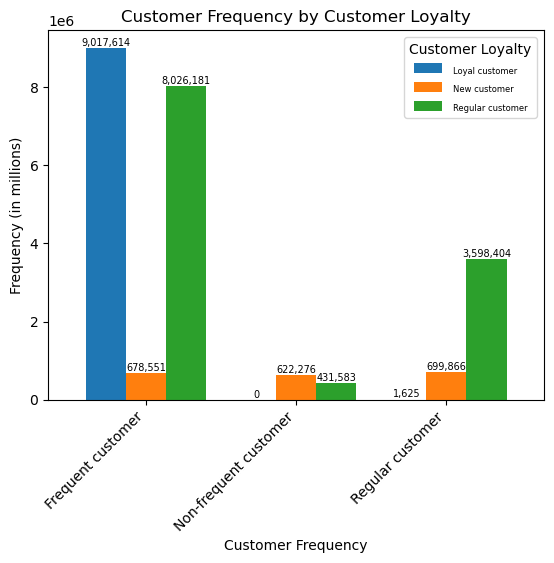

In [12]:
ax = cross_fre_loy.plot(kind='bar', width=0.8)

# add data labels
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_y() + rect.get_height() + 10000
    label = f"{int(rect.get_height()):,}"
    ax.annotate(label, (x, y), ha='center', va='bottom', fontsize=7)

# set chart title and axis labels
ax.set_title('Customer Frequency by Customer Loyalty')
ax.set_xlabel('Customer Frequency')
ax.set_ylabel('Frequency (in millions)')

# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# add legend
legend = ax.legend(title='Customer Loyalty')
for text in legend.get_texts():
    text.set_fontsize(6)

# save the chart as an image
fig = ax.get_figure()
fig.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'frequency_by_loyalty.png'))

# show chart
plt.show()


In [13]:
#create crosstab from 'alcohol_behavior' & 'loyalty_flag' columns
cross_alc_loy = pd.crosstab(df['alcohol_behavior'], df['loyalty_flag'], dropna = False)

In [14]:
cross_alc_loy

loyalty_flag,Loyal customer,New customer,Regular customer
alcohol_behavior,,,
alcoholic customers,34727,10774,57570
non-alcoholic customers,8984512,1989919,11998598


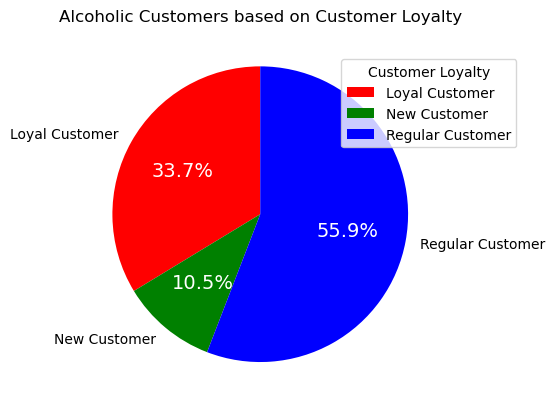

In [20]:
# Add data
sizes = [34727, 10774, 57570]
labels = ['Loyal Customer', 'New Customer', 'Regular Customer']
colors = ['red', 'green', 'blue']  # replace with your own data

# create pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, colors=colors, labels=labels,
                                  autopct='%1.1f%%', startangle=90)

# set data label properties
for text in autotexts:
    text.set_color('white')
    text.set_fontsize(14)

#create legend
ax.legend(wedges, labels, title='Customer Loyalty', loc="center left", bbox_to_anchor=(0.7, 0.3, 0.4, 1))

# set chart title
ax.set_title('Alcoholic Customers based on Customer Loyalty')

# save the chart as a PNG file
filename = 'Loyalty_with_alcohol_behavior.png'
filepath = os.path.join(path, '04. Analysis', 'Visualizations', filename)
fig.savefig(filepath)

# show chart
plt.show()


In [22]:
#create crosstab from 'pet_ownership' & 'loyalty_flag' columns
cross_pet_loy = pd.crosstab(df['pet_ownership'], df['loyalty_flag'], dropna = False)

In [23]:
cross_pet_loy

loyalty_flag,Loyal customer,New customer,Regular customer
pet_ownership,,,
non-pet owner,8996795,1994250,12016904
pet owner,22444,6443,39264


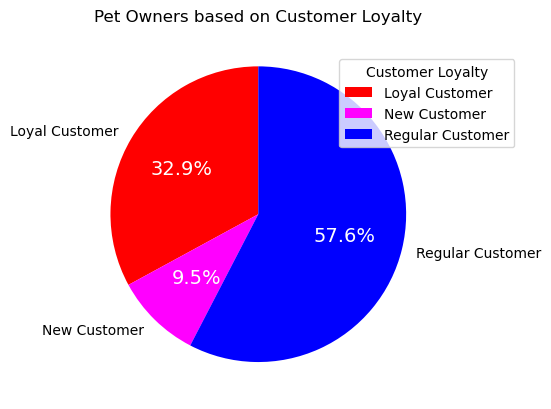

In [25]:
# Add data
sizes = [22444, 6443, 39264]
labels = ['Loyal Customer', 'New Customer', 'Regular Customer']
colors = ['red', 'magenta', 'blue'] 

# create pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, colors=colors, labels=labels,
                                  autopct='%1.1f%%', startangle=90)

# set data label properties
for text in autotexts:
    text.set_color('white')
    text.set_fontsize(14)

#create legend
ax.legend(wedges, labels, title='Customer Loyalty', loc="center left", bbox_to_anchor=(0.7, 0.3, 0.4, 1))

# set chart title
ax.set_title('Pet Owners based on Customer Loyalty')

# save the chart as a PNG file
filename = 'Loyalty_with_pet_owner.png'
filepath = os.path.join(path, '04. Analysis', 'Visualizations', filename)
fig.savefig(filepath)

# show chart
plt.show()

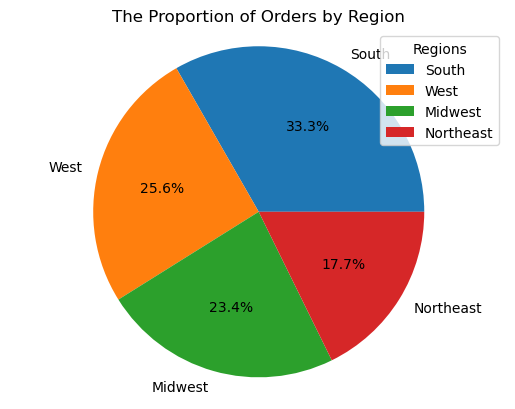

In [27]:
# count values of each category
region_counts = df['region'].value_counts(dropna=False)

# create pie chart
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('The Proportion of Orders by Region')
plt.legend(title='Regions')

# save the pie chart as an image
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'pie_region.png'))

In [28]:
#create crosstab from 'loyalty_flag' & 'price_label' columns
cross_loy_prl = pd.crosstab(df['loyalty_flag'], df['price_label'], dropna = False)

In [29]:
cross_loy_prl

price_label,High-range product,Low-range product,Mid-range-product
loyalty_flag,,,
Loyal customer,105070,2818713,6095456
New customer,26970,624493,1349230
Regular customer,160320,3763963,8131885


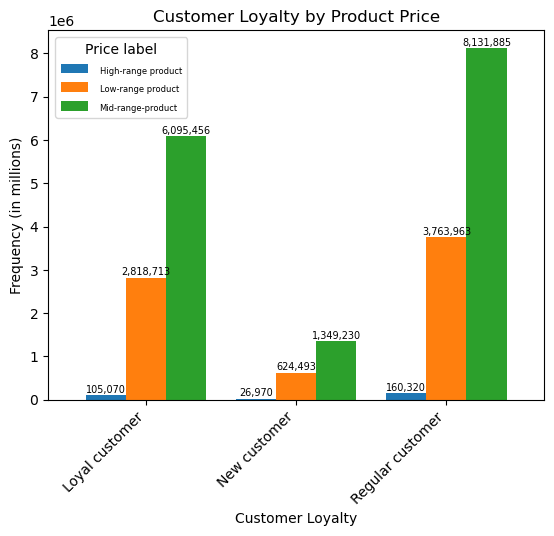

In [30]:
ax = cross_loy_prl.plot(kind='bar', width=0.8)

# add data labels
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_y() + rect.get_height() + 10000
    label = f"{int(rect.get_height()):,}"
    ax.annotate(label, (x, y), ha='center', va='bottom', fontsize=7)

# set chart title and axis labels
ax.set_title('Customer Loyalty by Product Price')
ax.set_xlabel('Customer Loyalty')
ax.set_ylabel('Frequency (in millions)')

# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# add legend
legend = ax.legend(title='Price label')
for text in legend.get_texts():
    text.set_fontsize(6)

# save the chart as an image
fig = ax.get_figure()
fig.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'loyalty_by_price_label.png'))

# show chart
plt.show()
